### Домашнее задание "Временные ряды, общая теория" (Знакомство с временными рядами)

Скачайте материалы к занятию. 

Проанализируйте ряды, сделайте их стационарными.

Решением будет ссылка на гитхаб с ноутбуком.

In [1]:
import pandas as pd
import numpy as np
from scipy.stats import boxcox
from statsmodels.tsa.stattools import adfuller
import statsmodels.api as sm
import statsmodels.tsa.api as smt

import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
sales_of_company_x = pd.read_csv("Series/monthly-sales-of-company-x-jan-6.csv")
robberies_in_boston = pd.read_csv("Series/monthly-boston-armed-robberies-j.csv")
airlines_passengers = pd.read_csv("Series/international-airline-passengers.csv")
mean_monthly_temp = pd.read_csv("Series/mean-monthly-air-temperature-deg.csv")
dowjones_closing = pd.read_csv("Series/weekly-closings-of-the-dowjones-.csv")
female_births = pd.read_csv("Series/daily-total-female-births-in-cal.csv")

In [31]:
all_series = {
    "Monthly sales of company X": sales_of_company_x["Count"],
    "Monthly Boston armed robberies": robberies_in_boston["Count"],
    "International airline passengers: monthly totals in thousands": airlines_passengers["Count"],
    "Mean monthly air temperature (Deg. F) Nottingham Castle": mean_monthly_temp["Deg"],
    "Weekly closings of the Dow-Jones industrial average": dowjones_closing["Close"],
    "Daily total female births in California": female_births["Count"]
}

# Отображение графиков

In [3]:
def plot_ts (a_s, n):
    with plt.style.context('bmh'):
        plt.figure(figsize=(16, 8))
        plt.plot(a_s, color='blue')
        plt.title(n)

# Ищем сезонность

In [4]:
def plot_ts_and_points(ts, start_point, step):
    new_series = [None for i in range(len(ts))]
    for i in range(len(ts)):
        pos = start_point + step * i
        if pos >= len(ts):
            break
        new_series[pos] = ts[pos]
    new_series = pd.Series(new_series)
    
    with plt.style.context('bmh'):
        plt.figure(figsize=(16, 8))
        ts_ax = plt.axes()
        ts.plot(ax=ts_ax, color='blue')
        new_series.plot(ax=ts_ax, style='ro')

# Нормализуем дисперсию

In [5]:
def b_c(b_s):
    series_d = boxcox(b_s, 0)
    with plt.style.context('bmh'):
        plt.figure(figsize=(16, 8))
        plt.plot(series_d, color='blue')
    return series_d

# Дифференцируем 

In [6]:
def dif(d_s):
    series_df = np.diff(d_s, 1)
    with plt.style.context('bmh'):
        plt.figure(figsize=(16, 8))
        plt.plot(series_df, color='blue')
    return series_df

# Тест Дики-Фуллера 

In [37]:
################
 # Dickey-Fuller
##################
def test_stationarity(timeseries):
    print('Results of Dickey-Fuller Test:')
    dftest = adfuller(timeseries, autolag='AIC')
    dfoutput = pd.Series(dftest[0:4], index=['Test Statistic', 'p-value', '#Lags Used', 'Number of Observations Used'])
    for [key, value] in dftest[4].items():
        dfoutput['Critical Value (%s)' % key] = value
    print(dfoutput)
    print(dfoutput['p-value'] ,dfoutput['p-value'] > 0.05 )
    print( ('Тест Дики-Фуллера НЕ ОТВЕРГАЕТ гипотезу о нестационарности ряда, так как p-value < 0.05' 
            if dfoutput['p-value'] < 0.05 
            else 'Тест Дики-Фуллера ОТВЕРГАЕТ гипотезу о нестационарности ряда, так как p-value >= 0.05' ))
    print('---------------------------------------------------------------------')

# Коррелограммы

In [38]:
def tsplot(y, lags=None, figsize=(14, 8), style='bmh'):
    if not isinstance(y, pd.Series):
        y = pd.Series(y)
    with plt.style.context(style):
        plt.figure(figsize=figsize)
        layout = (4, 1)
        ts_ax = plt.subplot2grid(layout, (0, 0), rowspan=2)
        acf_ax = plt.subplot2grid(layout, (2, 0))
        pacf_ax = plt.subplot2grid(layout, (3, 0))

        y.plot(ax=ts_ax, color='blue', label='Or')
        ts_ax.set_title('Original')

        smt.graphics.plot_acf(y, lags=lags, ax=acf_ax, alpha=0.05)
        smt.graphics.plot_pacf(y, lags=lags, ax=pacf_ax, alpha=0.05)

        plt.tight_layout()
    return

In [39]:
def final(v, k):
# отображаем
    plot_ts(v, k)
# сезонность
    plot_ts_and_points(v, 2, 4)
# Нормализуем дисперсию
    series_d = b_c(v)
# дифференцируем
    series_df = dif(series_d)
# тест ДФ
    test_stationarity(series_df)
# кореллограмма
    tsplot(series_df)

Results of Dickey-Fuller Test:
Test Statistic                 -3.135644
p-value                         0.024025
#Lags Used                     11.000000
Number of Observations Used    64.000000
Critical Value (1%)            -3.536928
Critical Value (5%)            -2.907887
Critical Value (10%)           -2.591493
dtype: float64
0.02402539283987578 False
Тест Дики-Фуллера НЕ ОТВЕРГАЕТ гипотезу о нестационарности ряда, так как p-value < 0.05
---------------------------------------------------------------------
Results of Dickey-Fuller Test:
Test Statistic                -7.601792e+00
p-value                        2.378602e-11
#Lags Used                     3.000000e+00
Number of Observations Used    1.130000e+02
Critical Value (1%)           -3.489590e+00
Critical Value (5%)           -2.887477e+00
Critical Value (10%)          -2.580604e+00
dtype: float64
2.3786024417438203e-11 False
Тест Дики-Фуллера НЕ ОТВЕРГАЕТ гипотезу о нестационарности ряда, так как p-value < 0.05
------------

<ipython-input-3-240c91bae992>:3: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  plt.figure(figsize=(16, 8))


Results of Dickey-Fuller Test:
Test Statistic                -1.296334e+01
p-value                        3.191205e-24
#Lags Used                     6.000000e+00
Number of Observations Used    3.570000e+02
Critical Value (1%)           -3.448801e+00
Critical Value (5%)           -2.869670e+00
Critical Value (10%)          -2.571101e+00
dtype: float64
3.191204585878006e-24 False
Тест Дики-Фуллера НЕ ОТВЕРГАЕТ гипотезу о нестационарности ряда, так как p-value < 0.05
---------------------------------------------------------------------


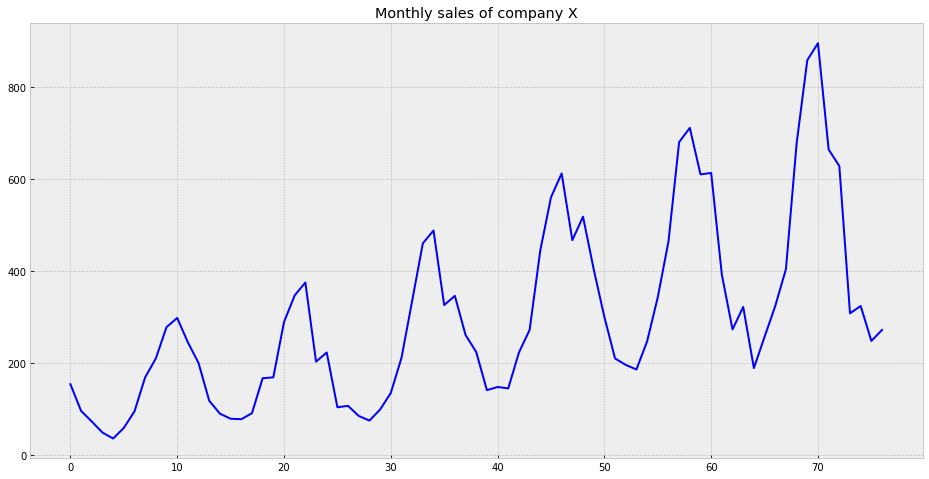

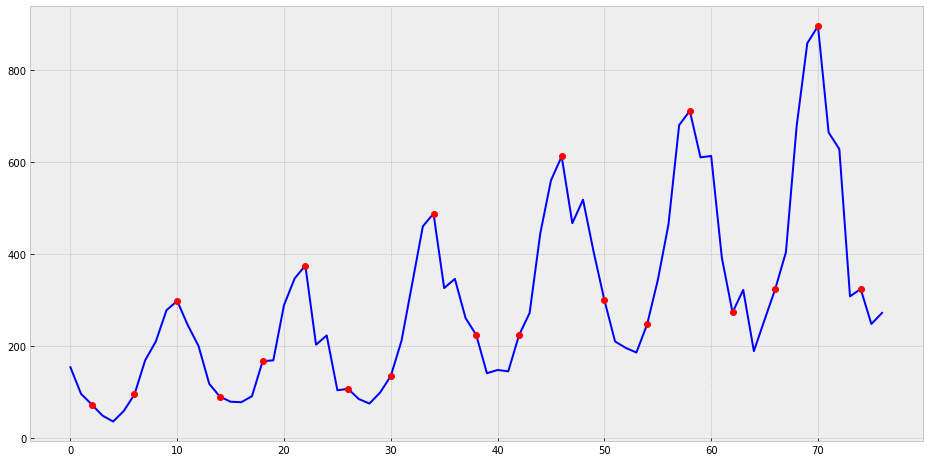

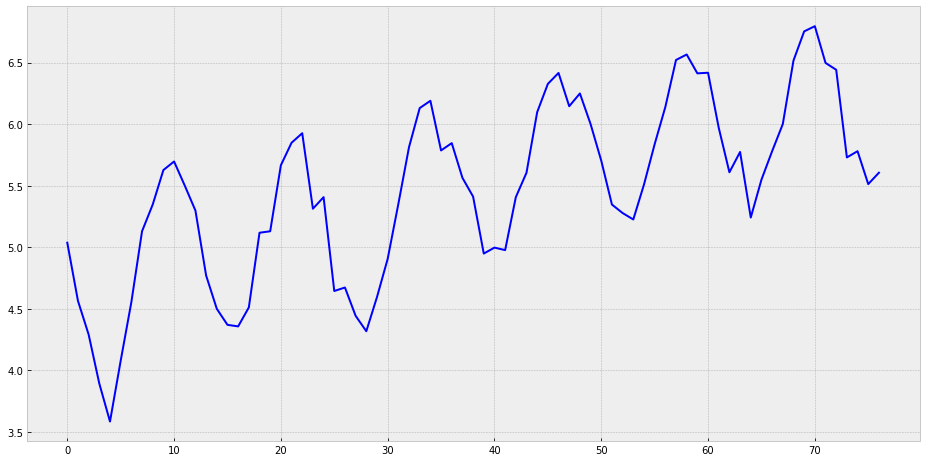

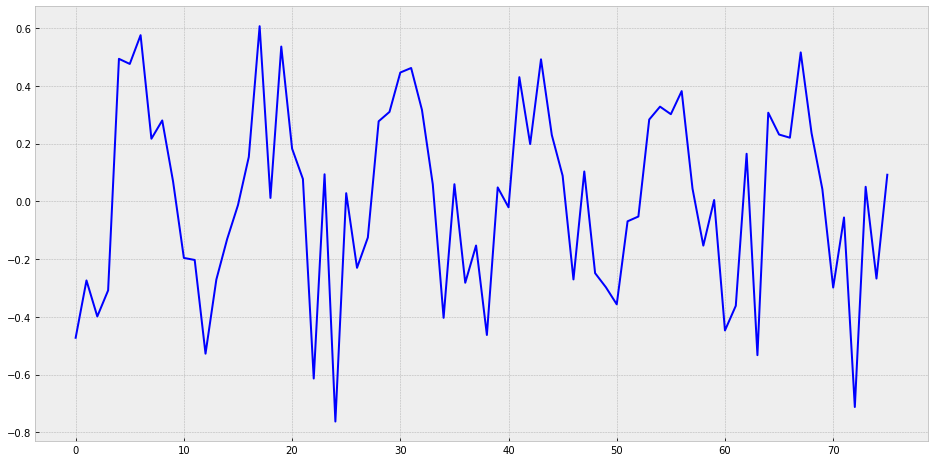

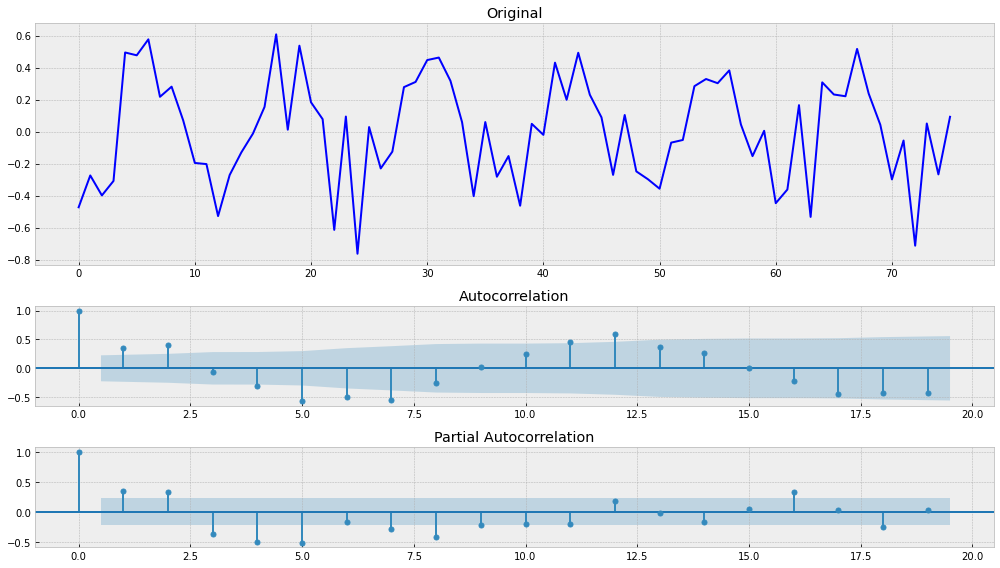

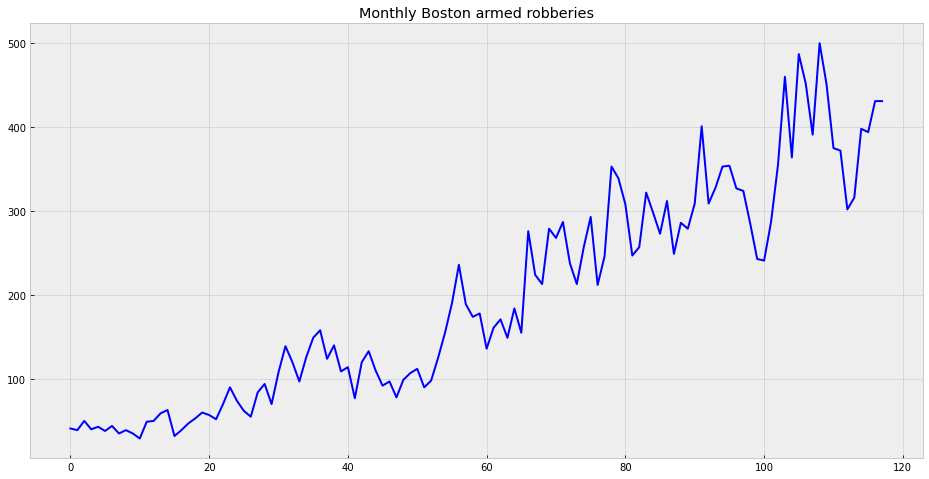

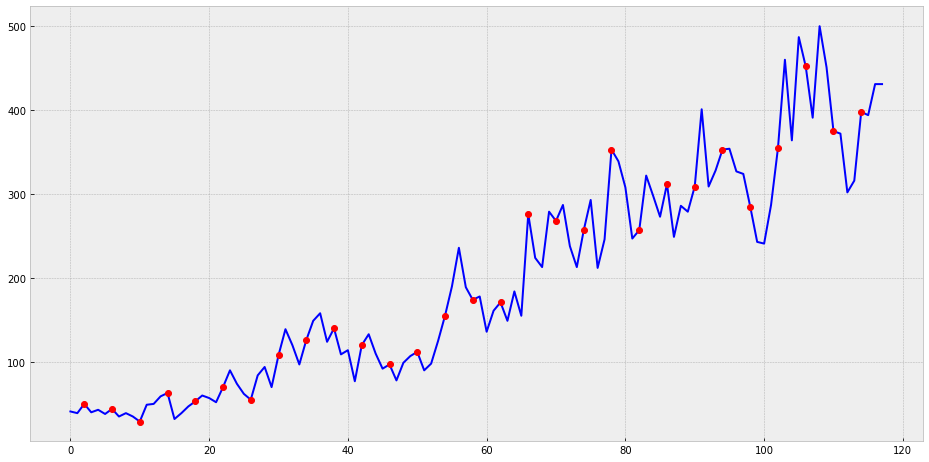

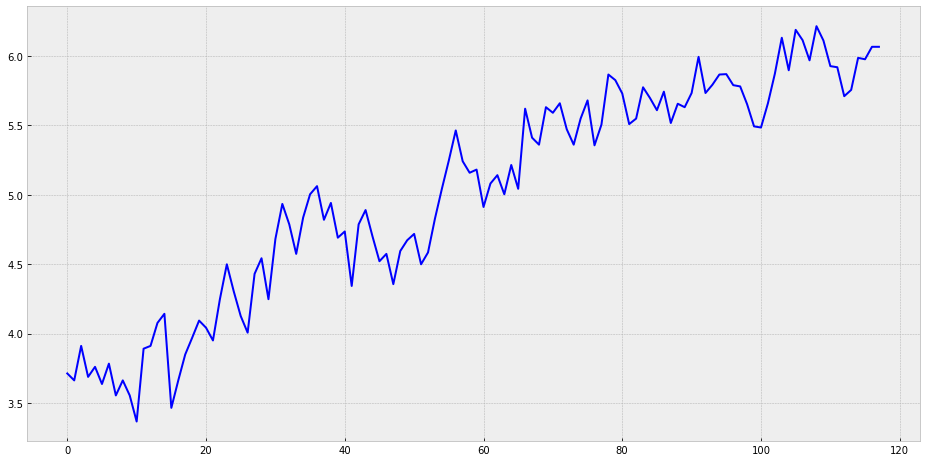

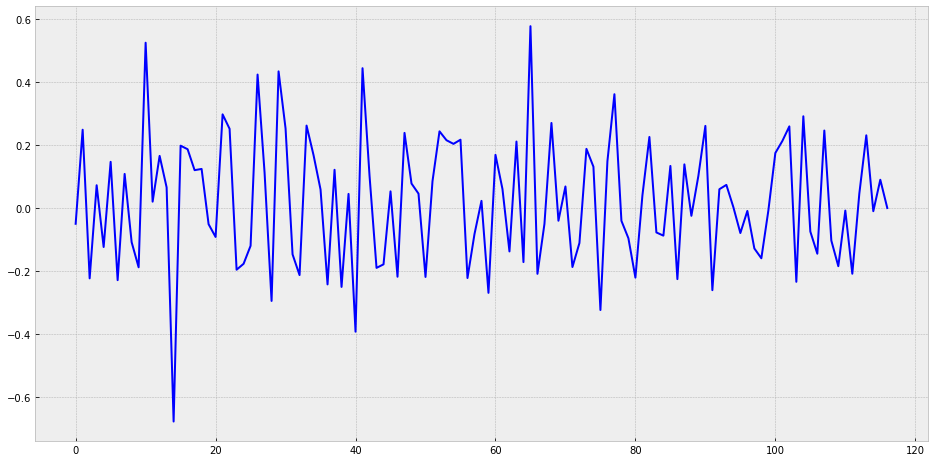

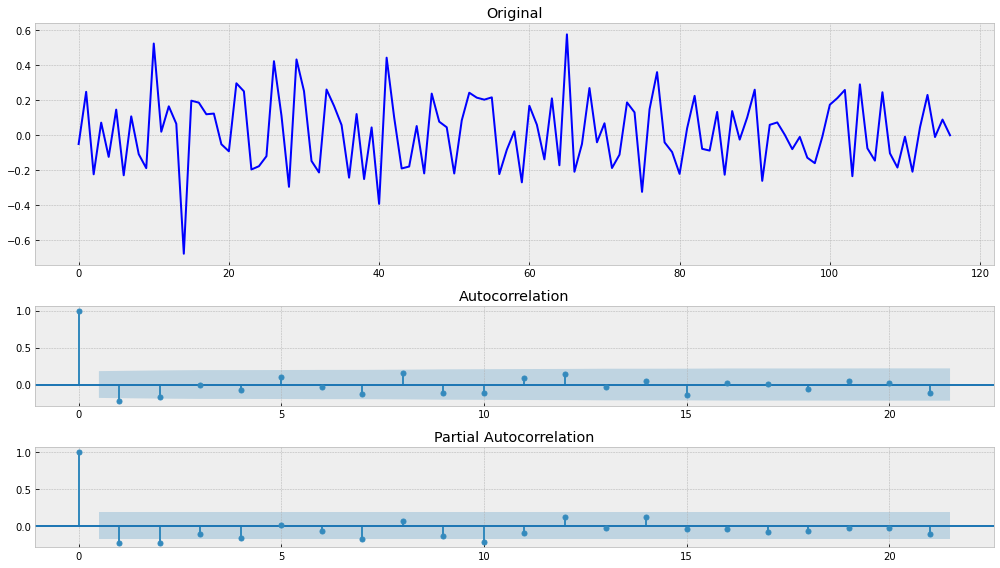

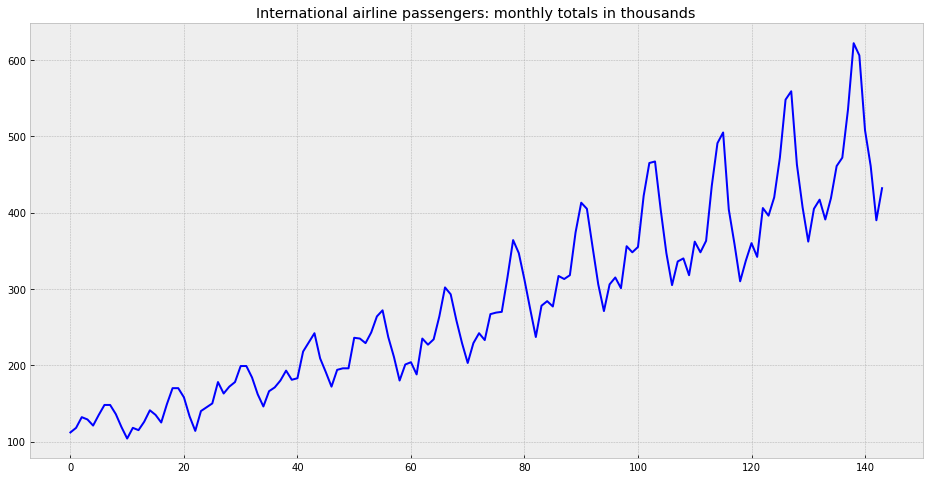

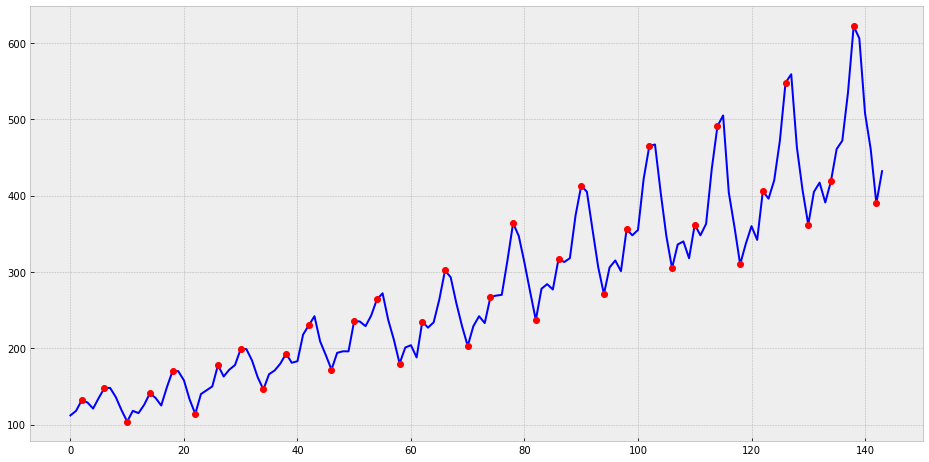

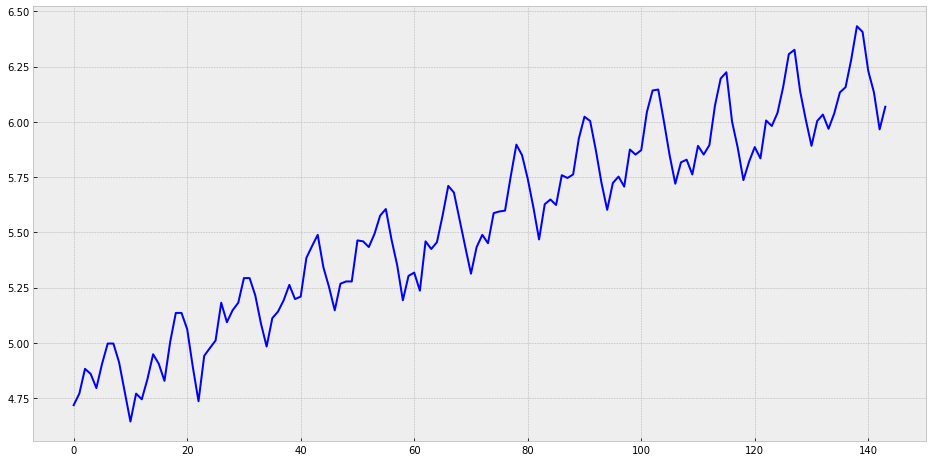

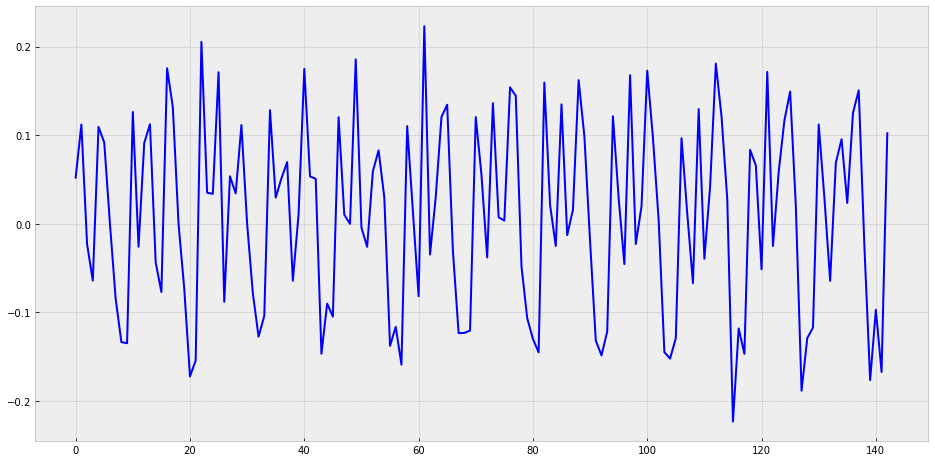

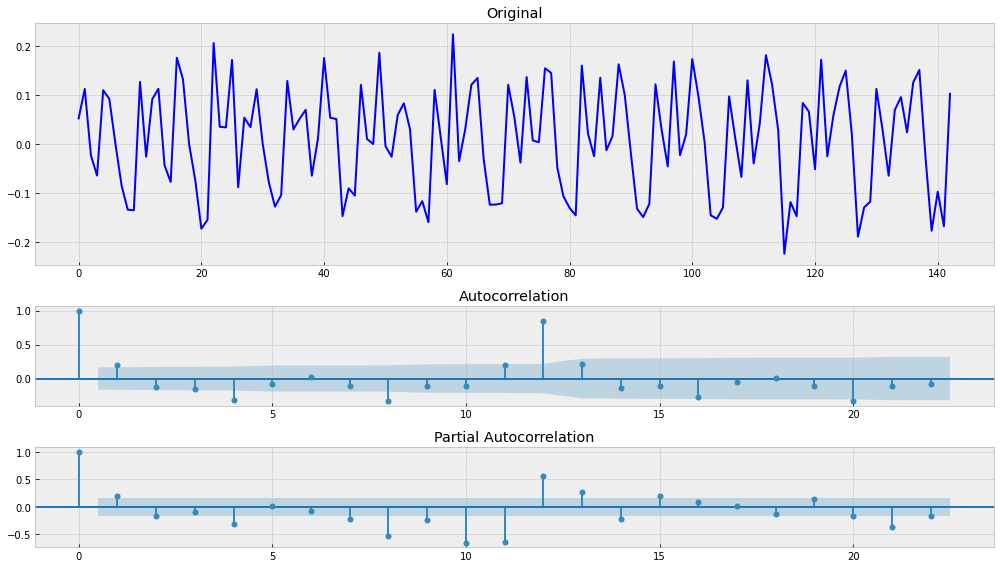

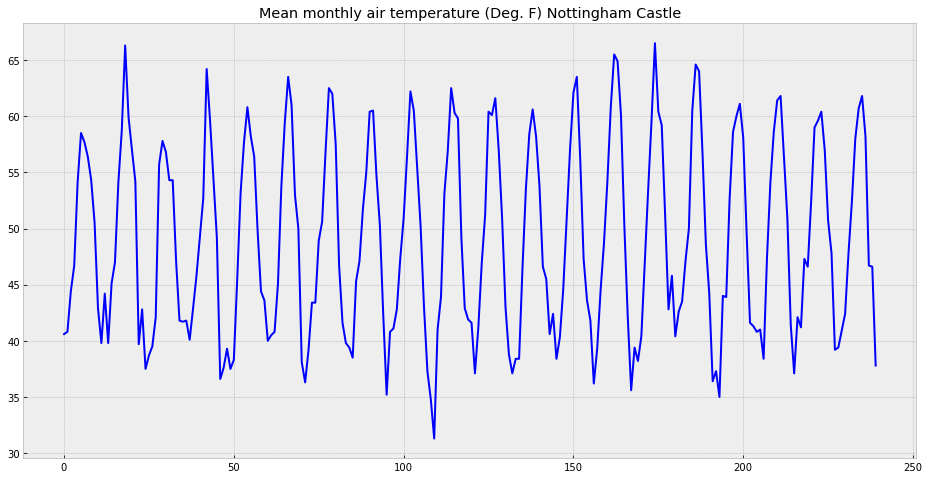

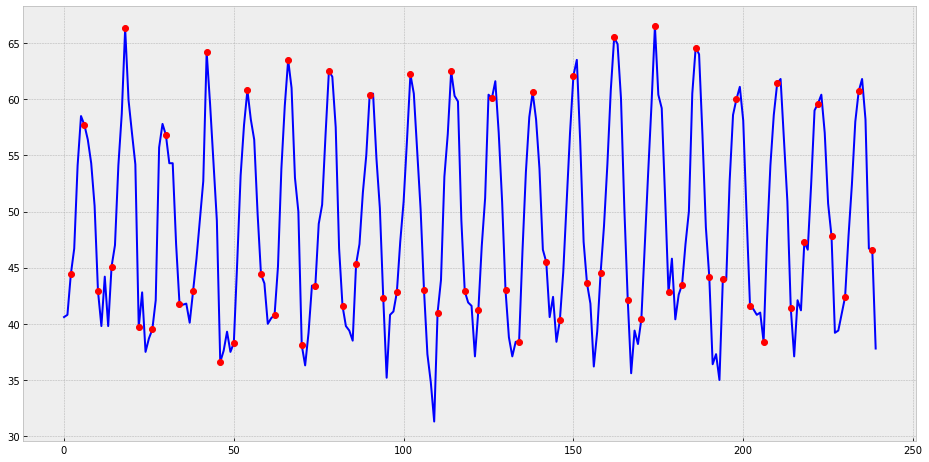

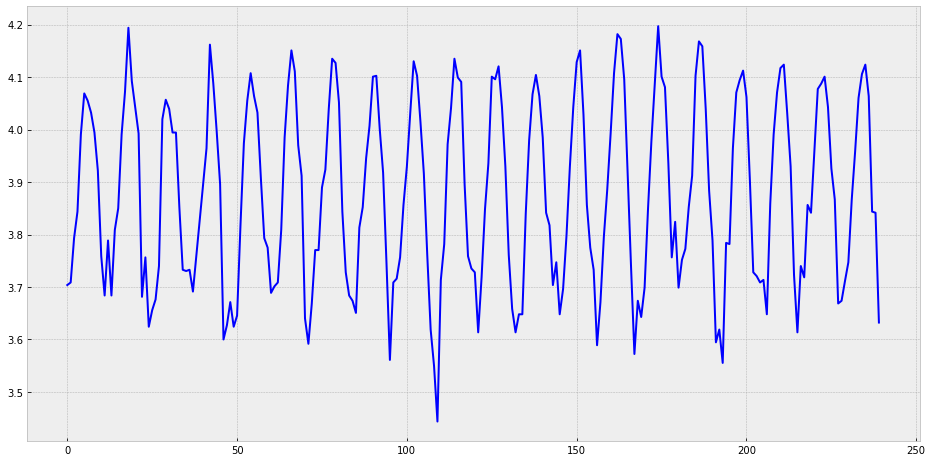

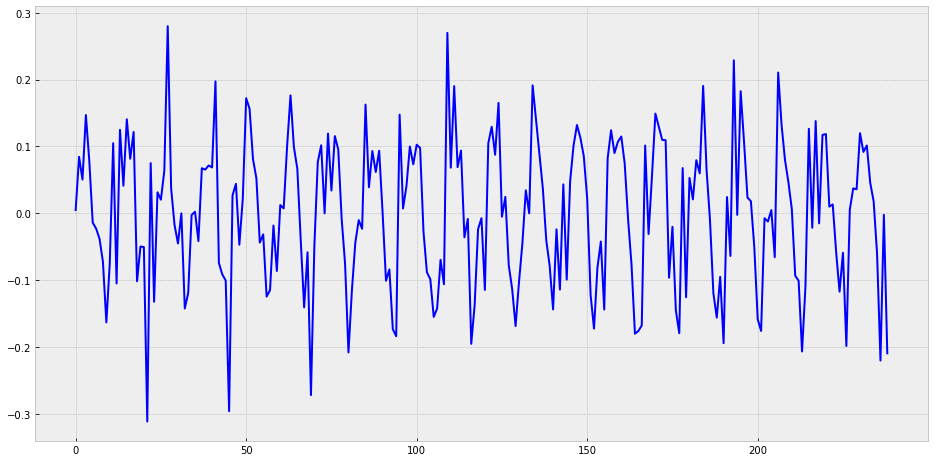

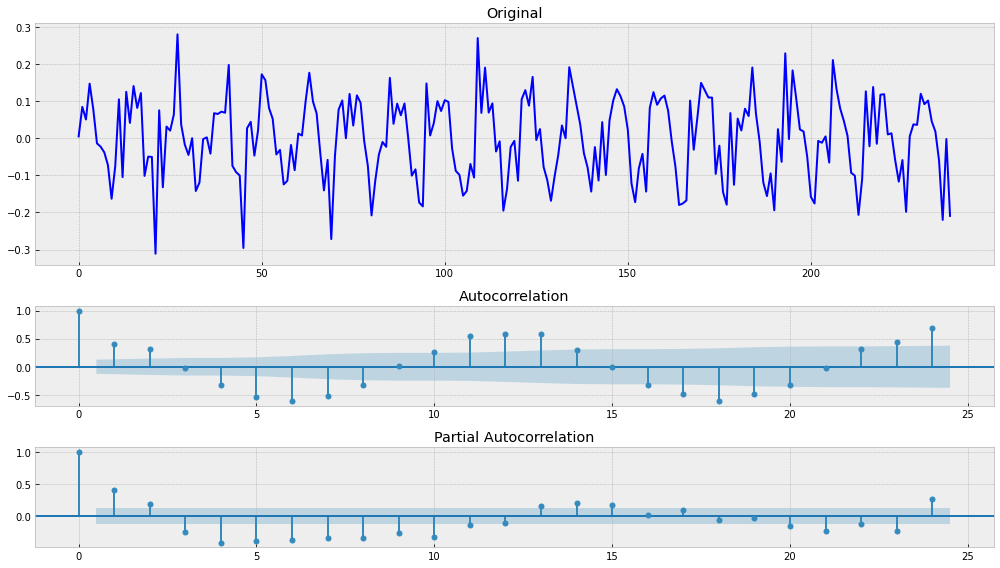

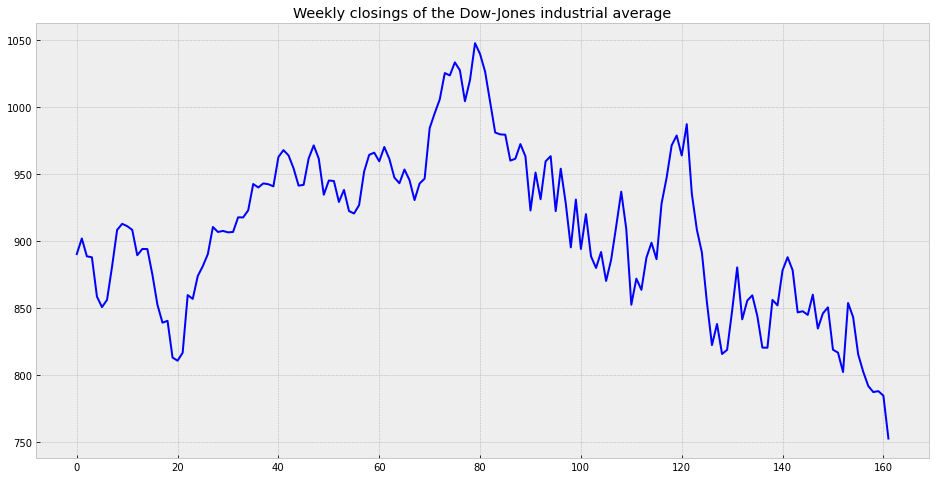

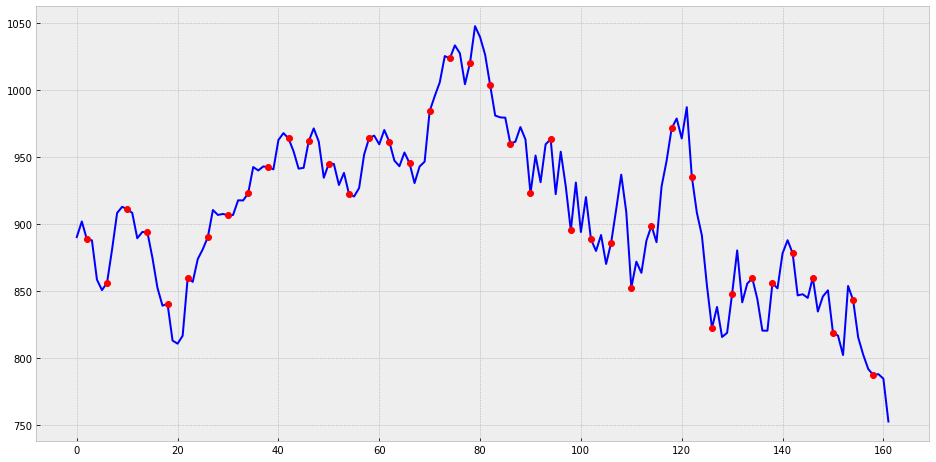

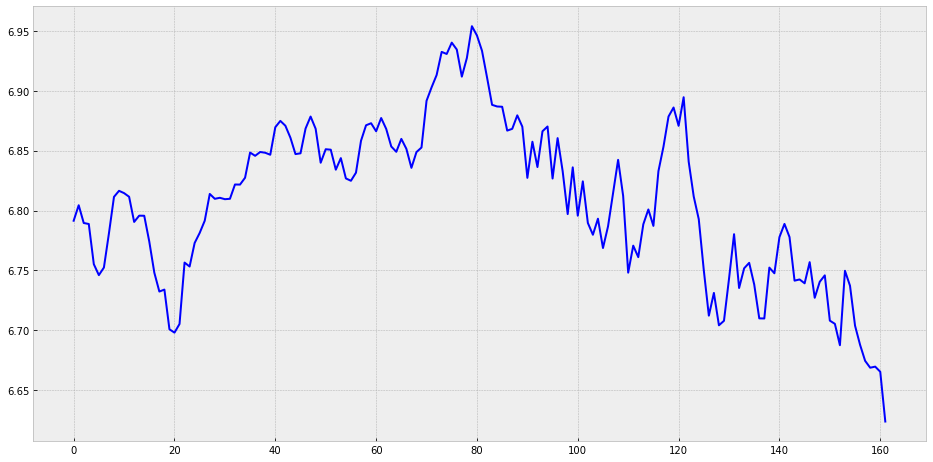

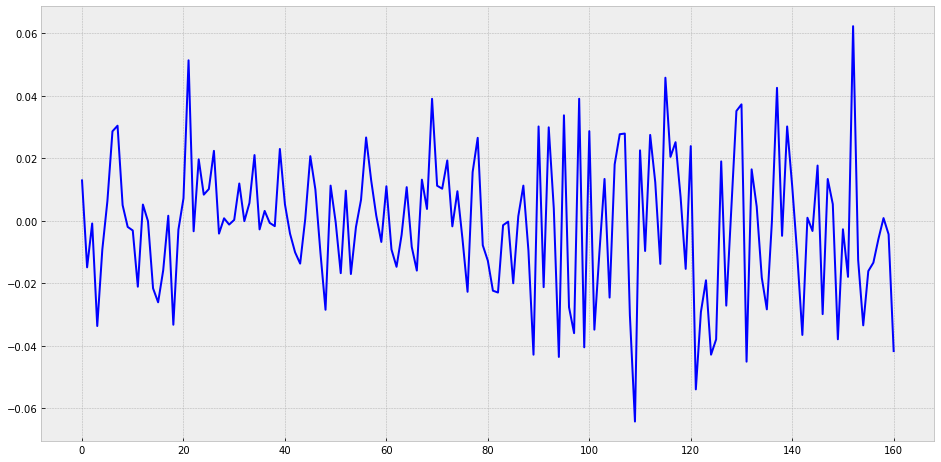

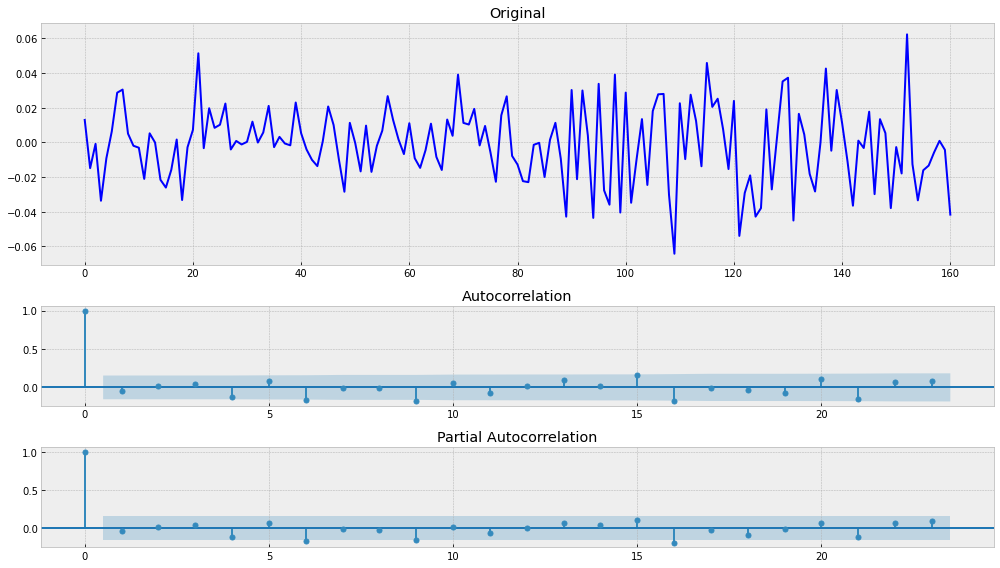

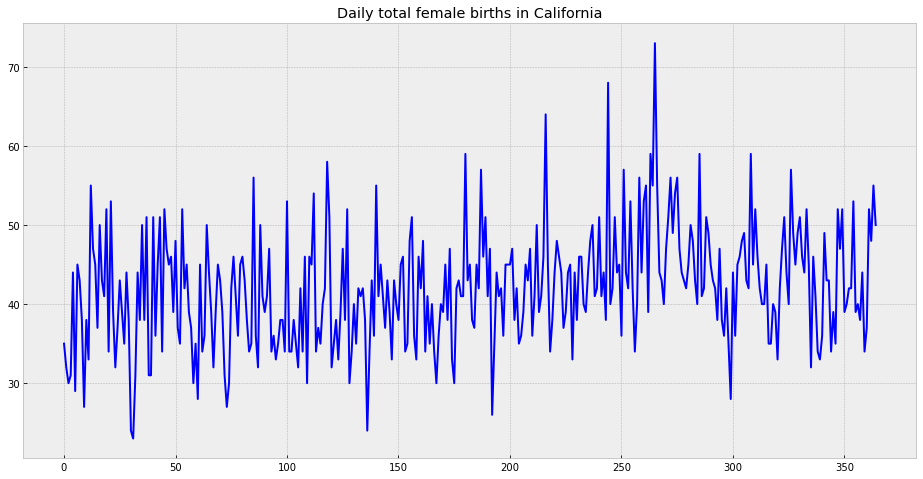

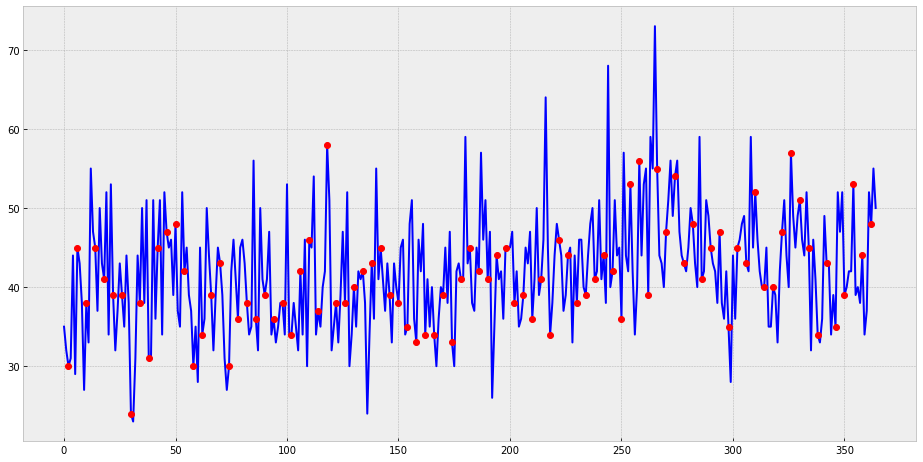

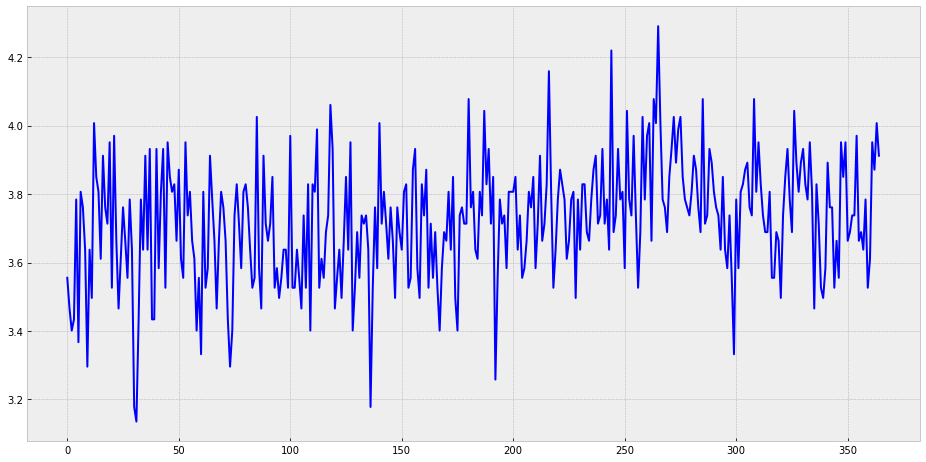

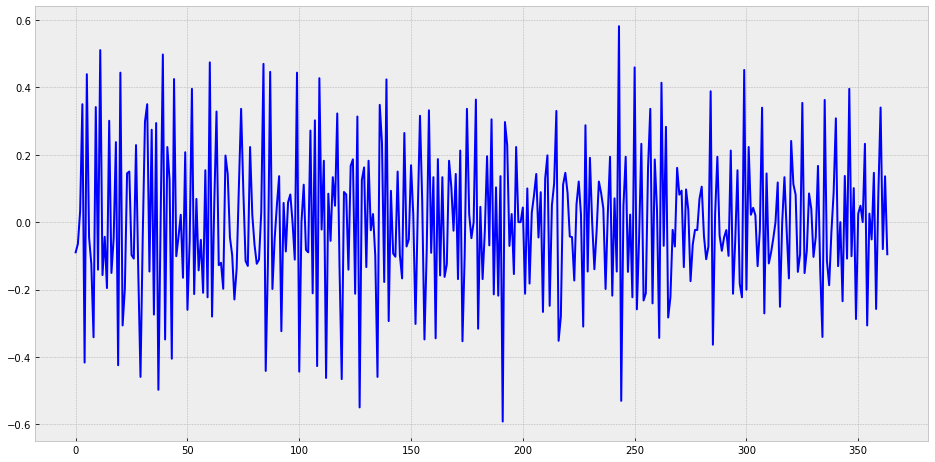

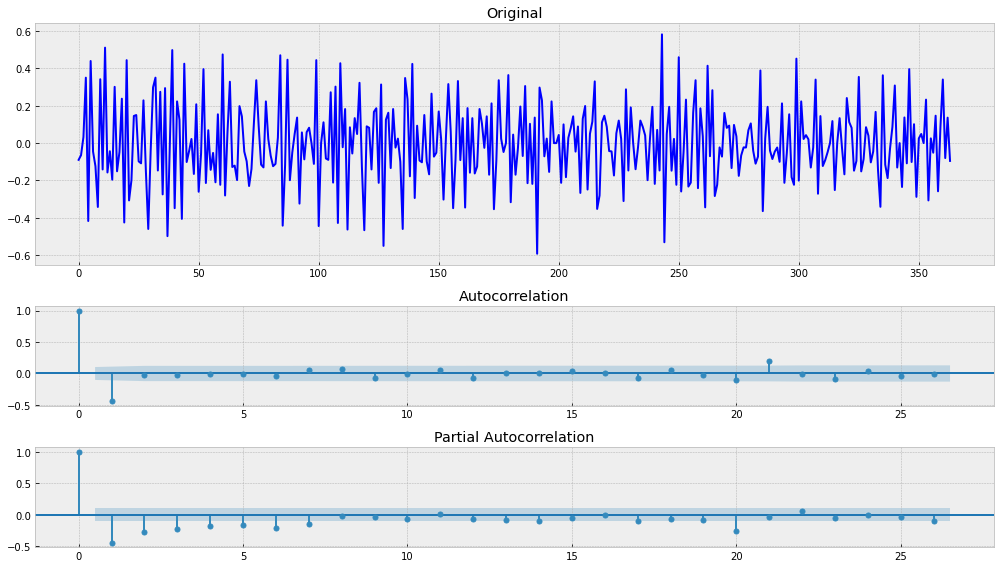

In [40]:
for key, value in all_series.items():
    final(value, key)